# Probability Assignment

To get full credit in this assignment you need to use `numpy`, `scipy` and `pandas` libraries. Sometimes you need to type equations - type equations in Latex math notation. To produce the plots you can use any plotting library you need.

PS1: We run the assignment through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions.

PS2: We are also monitoring solution websites and we will take action against anyone that uploads this to a solution website.

## Problem 1 (80 points)

A surgeon analyzes surgical videos and models events that occur. He describes the problem statement in [here](https://thomasward.com/simulating-correlated-data/). Your job is to replicate the solution in Python and demonstrate your understanding of the steps performed by  including adequate explanation of the code in either markdown cells or inline to the code.  You can insert as many markdown or code cells you need to perform the analysis. 


## Question 1a (10 points)

Write the code for generating the `gs` variable. This is the simplest random variable of the problem and can be generated independent of the others. 

In [4]:
import numpy as np

gs = np.random.normal(loc=7.25, scale=0.875, size=10000) # generate a normal distribution for the glove size since it is not correlated with the other variables and should not impact performance
print(gs)

[7.05659211 8.23112741 7.34633659 ... 6.5293867  6.93923835 8.15864904]


## Question 1b (20 points)

We have three variables, `ak`, `pp`, and `ptime`. Write the code for generating these variables from Multivate Gaussian distribution and replicate the associated plots. 



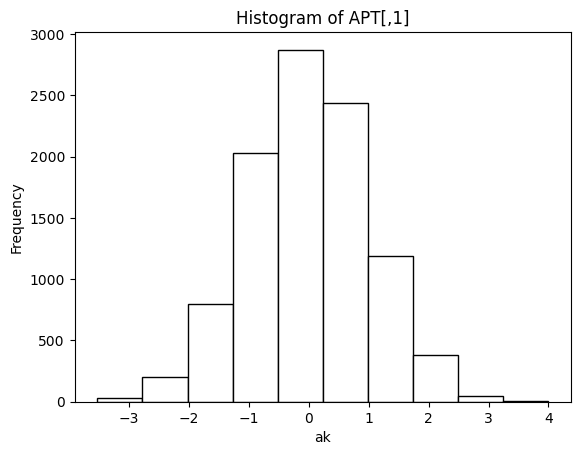

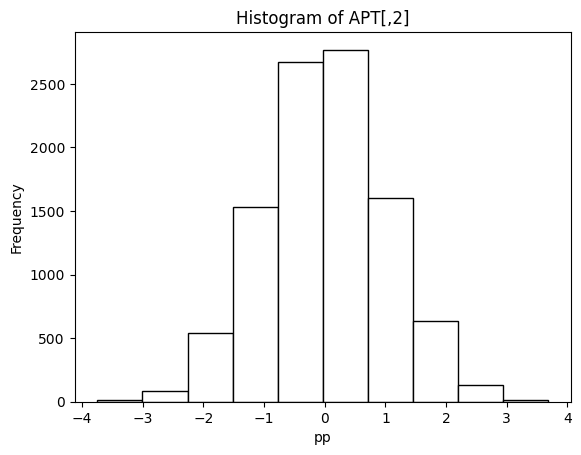

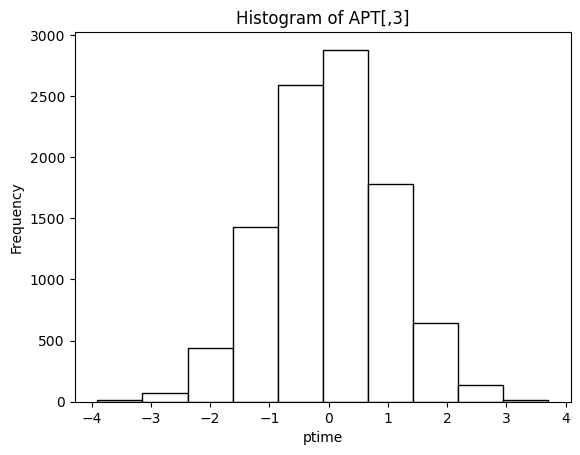

In [5]:
import matplotlib.pyplot as plt

sigma = [[1, 0.6, -0.9], [0.6, 1.0, -0.5], [-0.9, -0.5, 1.0]]
apt = np.random.multivariate_normal([0, 0, 0], sigma, 10000) # using a MVN normal distribution for the remaining 3 variables since they are correlated
ak = []
pp = []
ptime = []
for entry in apt: # separate the values into their corresponding columns for each value
    ak.append(entry[0])
    pp.append(entry[1])
    ptime.append(entry[2])
plt.title("Histogram of APT[,1]")
plt.xlabel("ak")
plt.ylabel("Frequency")
plt.hist(ak, color="white", ec="black")
plt.show()

plt.title("Histogram of APT[,2]")
plt.xlabel("pp")
plt.ylabel("Frequency")
plt.hist(pp, color="white", ec="black")
plt.show()

plt.title("Histogram of APT[,3]")
plt.xlabel("ptime")
plt.ylabel("Frequency")
plt.hist(ptime, color="white", ec="black")
plt.show()


## Question 1c (20 points)

Perform the probability inrtegral transform and replicate the associated plots.

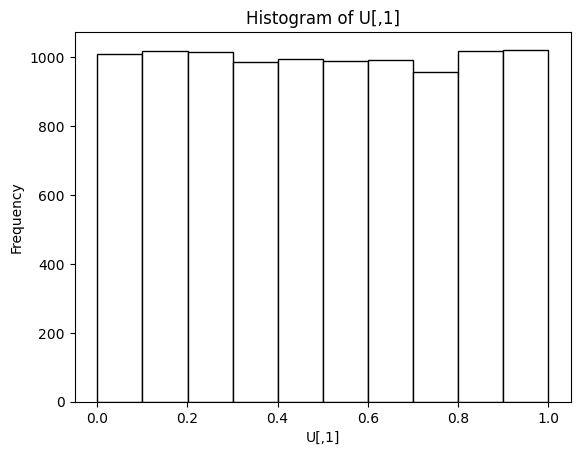

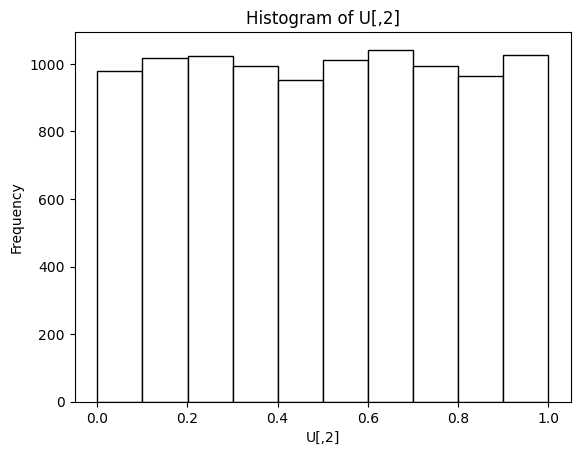

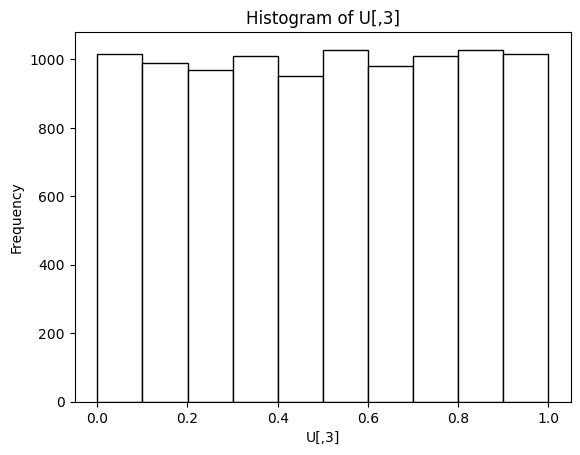

In [6]:
from scipy.stats import norm

u = norm.cdf(apt, 0, 1) # probability integral transform for APT to be separated by column to create plots
u_ak = []
u_pp = []
u_ptime = []
for entry in u:
    u_ak.append(entry[0])
    u_pp.append(entry[1])
    u_ptime.append(entry[2])
    
plt.title("Histogram of U[,1]")
plt.ylabel("Frequency")
plt.xlabel("U[,1]")
plt.hist(u_ak, color="white", ec="black")
plt.show()

plt.title("Histogram of U[,2]")
plt.ylabel("Frequency")
plt.xlabel("U[,2]")
plt.hist(u_pp, color="white", ec="black")
plt.show()

plt.title("Histogram of U[,3]")
plt.ylabel("Frequency")
plt.xlabel("U[,3]")
plt.hist(u_ptime, color="white", ec="black")
plt.show()

## Question 1d (20 points)

Perform the inverse transform sampling.

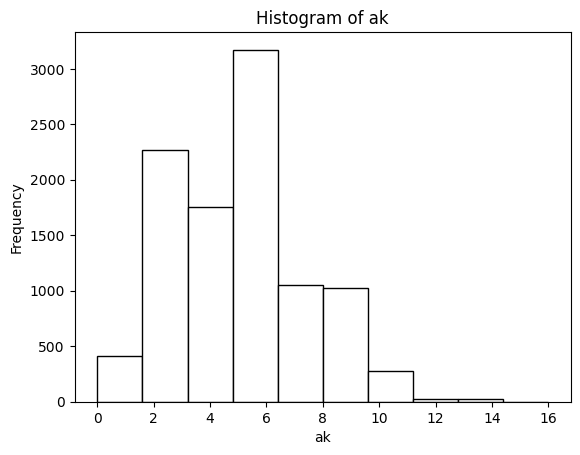

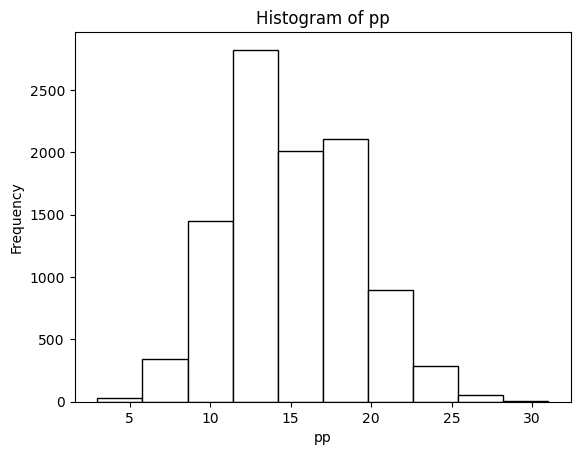

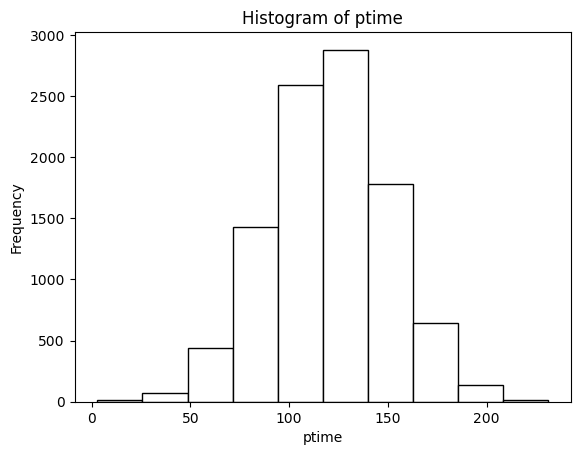

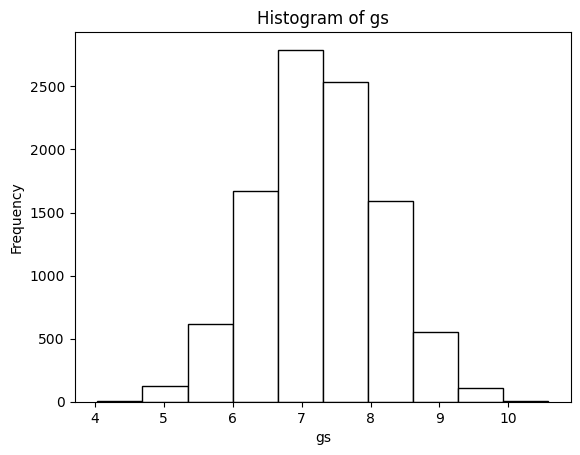

In [7]:
from scipy.stats import poisson

ak_poisson = poisson.ppf(u_ak, 5)
pp_poisson = poisson.ppf(u_pp, 15)
ptime_qnorm = norm.ppf(u_ptime, 120, 30) # ptime is not represented by a Poisson distribution like ak and pp because it is continuous where as ak and pp are counted
gs_rnorm = np.random.normal(loc=7.25, scale=0.875, size=10000)

plt.title("Histogram of ak")
plt.xlabel("ak")
plt.ylabel("Frequency")
plt.hist(ak_poisson, color="white", ec="black")
plt.show()

plt.title("Histogram of pp")
plt.xlabel("pp")
plt.ylabel("Frequency")
plt.hist(pp_poisson, color="white", ec="black")
plt.show()

plt.title("Histogram of ptime")
plt.xlabel("ptime")
plt.ylabel("Frequency")
plt.hist(ptime_qnorm, color="white", ec="black")
plt.show()

plt.title("Histogram of gs")
plt.xlabel("gs")
plt.ylabel("Frequency")
plt.hist(gs_rnorm, color="white", ec="black")
plt.show()

## Question 1e (10 points)

Replicate the final plot showcasing the correlations between the variables.


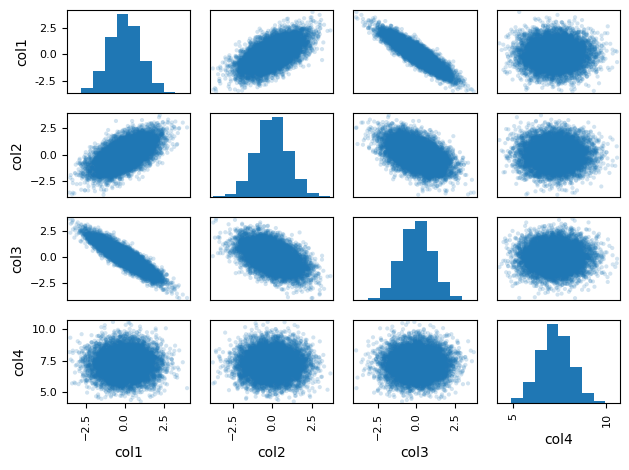

In [8]:
import pandas as pd

d = {'col1': ak, 'col2': pp, 'col3': ptime, 'col4': gs}
df = pd.DataFrame(data=d)
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
plt.tight_layout()
plt.show()

## Problem 2 (20 points)

You now pretend that the $n=4$ dimensional data you generated in Problem 1 arrive sequentially one at a time (the co-called **online** learning setting). Introduce the index $i$ to represent the ith arriving data sample $\mathbf x_i$. 

1. Write the expression of the *sample* correlation matrix (5 points)
2. Write the expression of the sample correlation matrix that can be estimated recursively and plot the elements of the sample correlation matrix from $i=1$ to $i=100$ (15 points)

In [9]:
# 1

# since the mean is 0 and the standard deviation of this set is 1 the covariance matrix can be reduced to equal the correlation matrix for the sample such that 

$${\hat{R}_{xx}^P = (1/p) * (\Sigma^{p}_{i=1} x_i*x_i^T)}$$

In [10]:
#2

# transforming the expression into a recursive expression requires splitting the portion into two parts such that we calculate the summation section until p-1 and add the current p term to the summed recursive result.

$${\hat{R}_{xx}^P = (1/p) [(\Sigma^{p-1}_{i=1} \underline{x_i}*\underline{x_i}^T) + (\underline{x_p}*\underline{x_p}^T)}]$$

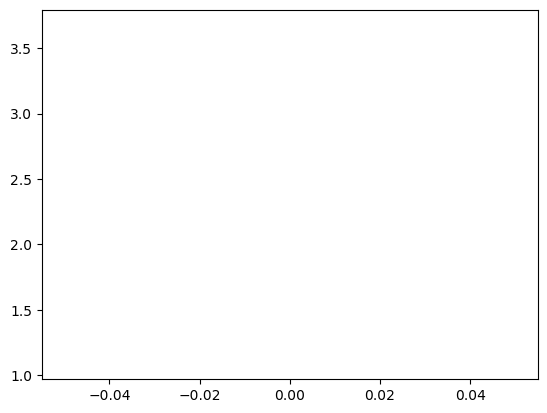

In [18]:
import math


a = np.random.multivariate_normal([0, 0, 0], sigma, 10000)

for p in range(1, 100):
    val = 0
    for i in range (p-1):
        val += np.dot(a[i], np.transpose(a[i]))
    val += np.dot(a[p], np.transpose(a[p]))
    val = val * (1/p)
    plt.plot(val)
    
